In [ ]:
# Make sure that the model folders are in the PYTHONPATH
import sys
sys.path.append('../')

In [ ]:
# Import all the utilities
import os 
import torch
from IBiT.IBiT import IBiT
from VisionTransformer.ViT import ViT
from utils.device_utils import get_device
import torch.nn as nn
import matplotlib.pyplot as plt
from utils.mask_utils import gen_filter_attention

Using CUDA


14
14
Using CUDA
img_h = 14 + img_w = 14
Using CUDA


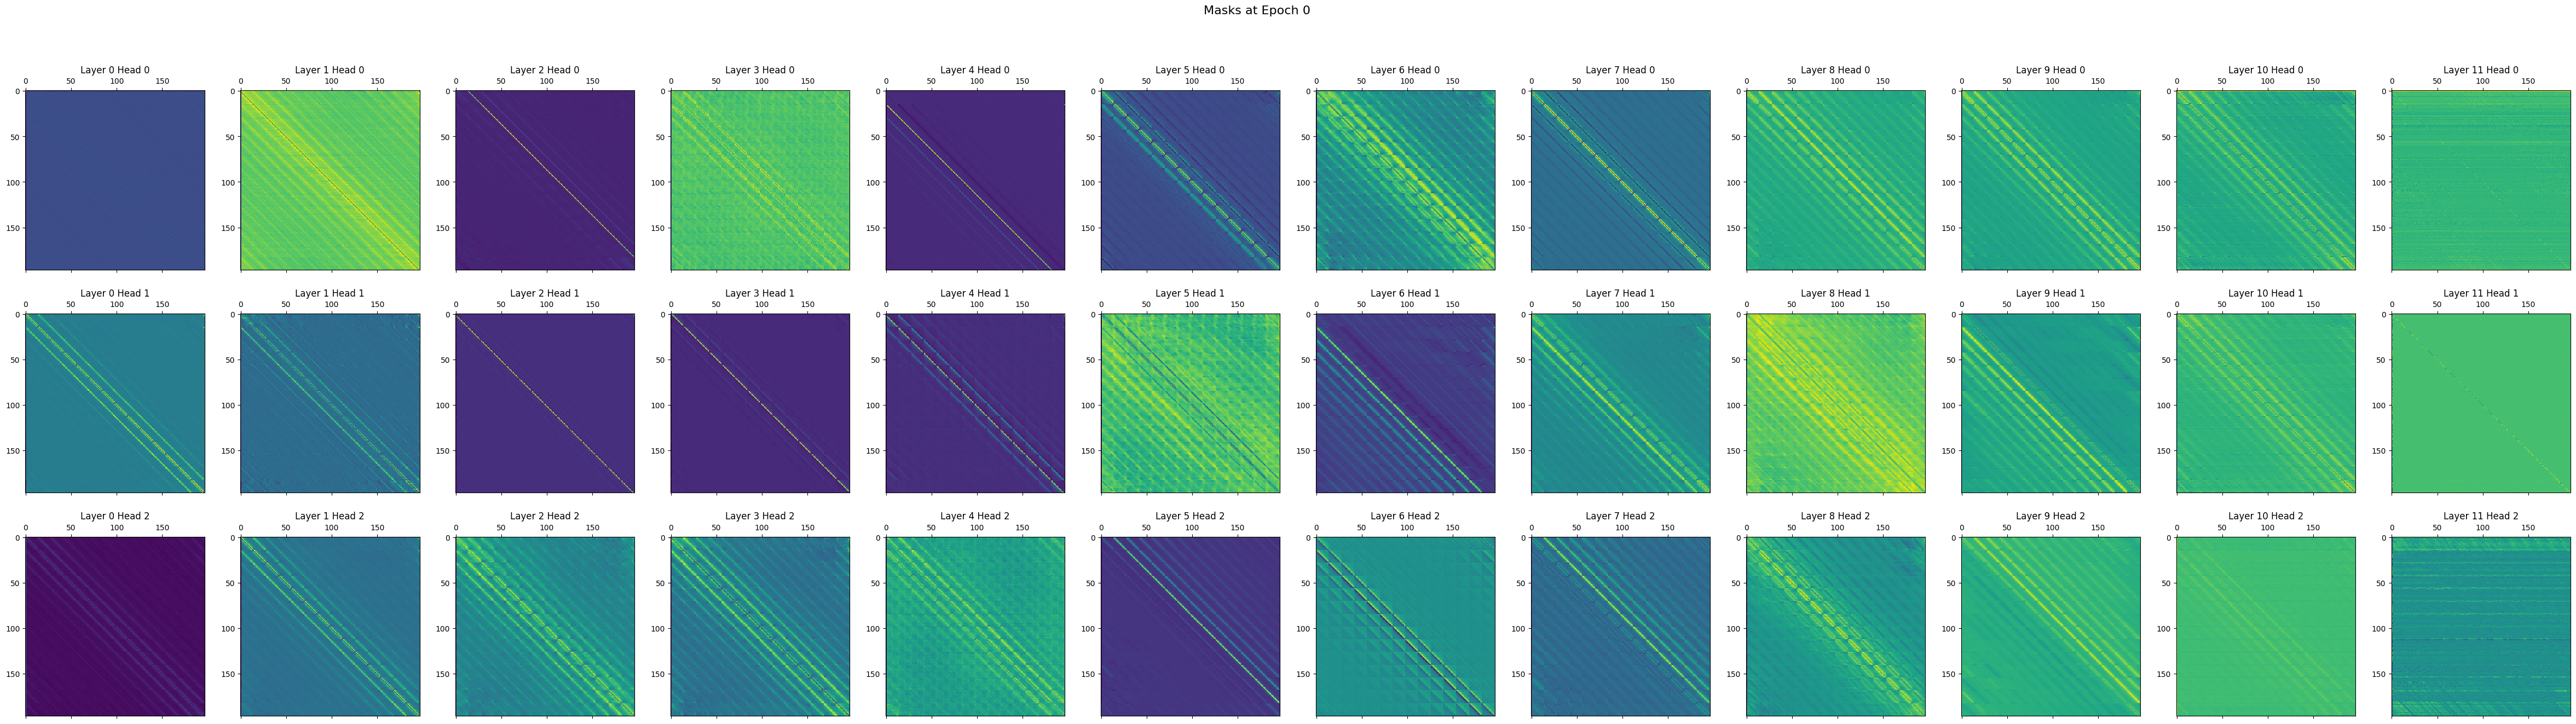

In [ ]:
# Generate roll matrix to roll the computed low rank masks
_, rolls = gen_filter_attention(filter=torch.eye(3), img_h = 14, img_w = 14, stride = 1, append_cls=True)

# Visualize the masks of the 299th model
for k in range(1):
    # Instantialize and load model
    IBiT_model = IBiT(img_h=224, img_w=224, patch_size=16, d_model=192, mask_fidelity=9, should_train=False, store_att=True)
    device = get_device()
    IBiT_model.load_state_dict(torch.load(f'/workspace/ConvFormer/Repo/models/IBiTMaskFid9/model{299}.pt'))
    mask_list = [param for name, param in IBiT_model.named_parameters() if "mask" in name]
    masks = []
    
    #Plot the computed learned masks of the model
    fig, axs = plt.subplots(3, 12, figsize=(60, 15))
    for i in range(len(mask_list)//2):
        masks.append(mask_list[i*2:(i+1)*2])
    for i, (mask1, mask2) in enumerate(masks):
        for j in range(mask1.shape[0]):            
            with torch.no_grad():
                axs[j, i].matshow(torch.gather(torch.matmul(mask1[j].cpu().transpose(-1,-2), mask2.cpu()[j]), -1, rolls))
                axs[j, i].set_title(f'Layer {i} Head {j}')
    fig.suptitle(f'Masks at Epoch {k*50}', fontsize=16)
    fig.show()
    